In [1]:
# import psycopg2Z

from pandas.core.frame import DataFrame, Series
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
#for word embedding
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to /home/aniketh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/aniketh/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/aniketh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aniketh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

## Create IoT dataset

In [3]:
df = pd.read_csv('more-iot-dataset.csv')
df = df.iloc[1:]

In [4]:
df['iot'] = df['description'].str.contains('smart|iot|companion|home automation|control|connected devices|integration|home management|remote access|automation routines', case=False)
df.drop_duplicates(subset='pkg_name', keep='first', inplace=True)

In [5]:
df[df['iot'] == True]

,pkg_name,app_name,version,description,category,category_id,content_rating,installs,content_rating_description,url,iot
1,com.amazon.dee.app,Amazon Alexa,2.2.511197.0,Use the Amazon Alexa App to set up your Alexa-...,Lifestyle,LIFESTYLE,Everyone,"100,000,000+",NaN,https://play.google.com/store/apps/details?id=...,True
4,ai.bite.biteapp,Bitesnap: Photo Food Tracker a,1.7.1,Bitesnap is a fun and easy way to track what y...,Health & Fitness,HEALTH_AND_FITNESS,Everyone,"100,000+",NaN,https://play.google.com/store/apps/details?id=...,True
5,ai.mxlabs.heartmonitor,Heart Monitor: Measure BP & HR,2.0.17,Heart Monitor is an easy-to-use camera-based h...,Medical,MEDICAL,Everyone,"100,000+",NaN,https://play.google.com/store/apps/details?id=...,True
7,am.smarter.smarter3,Smarter 3 - Connected Kitchen,22.3.4,A smart kitchen to serve you.\r\n\r\nReinvent ...,Lifestyle,LIFESTYLE,Everyone,"10,000+",NaN,https://play.google.com/store/apps/details?id=...,True
8,amazon.speech.sim,Amazon Alexa - Show Mode for L,1.0.2652.0,Amazon Alexa - Show Mode for Lenovo lets you a...,Tools,TOOLS,Everyone,"500,000+",NaN,https://play.google.com/store/apps/details?id=...,True
...,...,...,...,...,...,...,...,...,...,...,...
1891,tunein.player,"TuneIn Radio: News, Music & FM",31.4.3,<b>HEAR WHAT MATTERS TO YOU</b>\r\n\r\nWith Tu...,Music & Audio,MUSIC_AND_AUDIO,Teen,"100,000,000+",Diverse Content: Discretion Advised,https://play.google.com/store/apps/details?id=...,True
1897,us.nonda.zus,ZUS - Save Car Expenses,8.17.5,"Easily Earn Cash Rewards & SAVE $1,400+ on You...",Auto & Vehicles,AUTO_AND_VEHICLES,Everyone,"100,000+",NaN,https://play.google.com/store/apps/details?id=...,True
1899,wl.smartled,Lotus Lantern,6.2.1,Through this mobile APP， you can not only cont...,Tools,TOOLS,Everyone,"1,000,000+",NaN,https://play.google.com/store/apps/details?id=...,True
1900,wl.smartled.rgb,Magic Lantern,6.9.6,You can use it to do some controls and setting...,Entertainment,ENTERTAINMENT,Everyone,"100,000+",NaN,https://play.google.com/store/apps/details?id=...,True


## Create non-IoT dataset

In [6]:
df_non = pd.read_csv('non-iot-dataset.csv')

In [7]:
df_non = df_non.iloc[1:]

In [8]:
df_non

,pkg_name,app_name,version,description,category,category_id,content_rating,installs,content_rating_description,url
1,adore.grofood.in,All in One Shopping App - Onli,1.4,All in One Shopping App : Free Online Shopping...,Shopping,SHOPPING,Teen,100+,NaN,https://play.google.com/store/apps/details?id=...
2,ae.propertyfinder.propertyfinder,Property Finder - Real Estate,11.14.0,Finding a home 🏠 in the Middle East has never ...,House & Home,HOUSE_AND_HOME,Everyone,"1,000,000+",NaN,https://play.google.com/store/apps/details?id=...
3,ai.autonomous.megapp,Autonomous Connect OS,2.8.0,Connect by Autonomous lets you easily connect ...,Business,BUSINESS,Everyone,500+,NaN,https://play.google.com/store/apps/details?id=...
4,air.bg.lan.Monopoli,Rento - Dice Board Game Online,6.9.7,Rento is online business dice game. It is boar...,Board,GAME_BOARD,Everyone,"10,000,000+",NaN,https://play.google.com/store/apps/details?id=...
5,air.com.buffalo_studios.newflashbingo,Bingo Blitz™️ - Bingo Games,5.17.1,Experience your free online bingo game as you ...,Board,GAME_BOARD,Teen,"50,000,000+",Simulated Gambling,https://play.google.com/store/apps/details?id=...
...,...,...,...,...,...,...,...,...,...,...
1695,wp.wattpad,Wattpad - Read & Write Stories,NaN,<b> Wattpad. Where stories live. </b>\r\n\r\n<...,Books & Reference,BOOKS_AND_REFERENCE,Teen,"100,000,000+",NaN,https://play.google.com/store/apps/details?id=...
1696,xyz.echoes.android,ECHOES,5.2.59,"-- Beautiful sound walks, smart technology, un...",Music & Audio,MUSIC_AND_AUDIO,Everyone,"10,000+",NaN,https://play.google.com/store/apps/details?id=...
1697,yqtrack.app,17TRACK Package Tracker,3.1.6483,17TRACK Package Tracker is a global shopping p...,Shopping,SHOPPING,Everyone,"10,000,000+",NaN,https://play.google.com/store/apps/details?id=...
1698,zahleb.me,Catch — Thrilling Chat Stories,3.3.8,In the Catch app you will find dozens of breat...,Books & Reference,BOOKS_AND_REFERENCE,Teen,"10,000,000+","Violence, Blood, Sexual Themes, Use of Alcohol...",https://play.google.com/store/apps/details?id=...


In [79]:
df_non['installs'] = df_non['installs'].str.replace(',', '').str.replace('+', '').astype(int)

/tmp/ipykernel_892669/4222900227.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_non['installs'] = df_non['installs'].str.replace(',', '').str.replace('+', '').astype(int)
/tmp/ipykernel_892669/4222900227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non['installs'] = df_non['installs'].str.replace(',', '').str.replace('+', '').astype(int)


In [81]:
df_non[df_non['installs'] >= 1000000]

,pkg_name,app_name,version,description,category,category_id,content_rating,installs,content_rating_description,url,IoT
2,ae.propertyfinder.propertyfinder,Property Finder - Real Estate,11.14.0,Finding a home 🏠 in the Middle East has never ...,House & Home,HOUSE_AND_HOME,Everyone,1000000,NaN,https://play.google.com/store/apps/details?id=...,0
4,air.bg.lan.Monopoli,Rento - Dice Board Game Online,6.9.7,Rento is online business dice game. It is boar...,Board,GAME_BOARD,Everyone,10000000,NaN,https://play.google.com/store/apps/details?id=...,0
5,air.com.buffalo_studios.newflashbingo,Bingo Blitz™️ - Bingo Games,5.17.1,Experience your free online bingo game as you ...,Board,GAME_BOARD,Teen,50000000,Simulated Gambling,https://play.google.com/store/apps/details?id=...,0
6,air.com.KalromSystems.WomenWorkout,Women Workout: Home Gym Cardio,3.1.4,Women workout training club is the optimal <b>...,Health & Fitness,HEALTH_AND_FITNESS,Everyone,1000000,NaN,https://play.google.com/store/apps/details?id=...,0
7,air.com.lunime.gachalife,Gacha Life,1.1.4,★ Welcome to Gacha Life ★\r\nAre you ready to ...,Casual,GAME_CASUAL,Everyone,100000000,NaN,https://play.google.com/store/apps/details?id=...,0
...,...,...,...,...,...,...,...,...,...,...,...
1692,wl.smartled,Lotus Lantern,6.2.1,Through this mobile APP， you can not only cont...,Tools,TOOLS,Everyone,1000000,NaN,https://play.google.com/store/apps/details?id=...,0
1694,women.workout.female.fitness,Workout for Women: Fit at Home,1.4.5,Move now! A better me is approaching!\r\n\r\nG...,Health & Fitness,HEALTH_AND_FITNESS,Everyone,50000000,NaN,https://play.google.com/store/apps/details?id=...,0
1695,wp.wattpad,Wattpad - Read & Write Stories,NaN,<b> Wattpad. Where stories live. </b>\r\n\r\n<...,Books & Reference,BOOKS_AND_REFERENCE,Teen,100000000,NaN,https://play.google.com/store/apps/details?id=...,0
1697,yqtrack.app,17TRACK Package Tracker,3.1.6483,17TRACK Package Tracker is a global shopping p...,Shopping,SHOPPING,Everyone,10000000,NaN,https://play.google.com/store/apps/details?id=...,0


In [83]:
1020/1699

0.6003531489111242

## create total dataset

In [9]:
df['IoT'] = 1
df_non['IoT'] = 0

In [10]:
df = df.append(df_non, ignore_index=True)
# df = df.drop(columns="lang")

In [11]:
df.drop_duplicates(subset='pkg_name', keep='first', inplace=True)
df

,pkg_name,app_name,version,description,category,category_id,content_rating,installs,content_rating_description,url,iot,IoT
0,com.amazon.dee.app,Amazon Alexa,2.2.511197.0,Use the Amazon Alexa App to set up your Alexa-...,Lifestyle,LIFESTYLE,Everyone,"100,000,000+",NaN,https://play.google.com/store/apps/details?id=...,True,1
1,abnehm.app.low.carb,Low Carb Tracker & Recipes App,2.22.4,This weight loss app is offering you a) cookin...,Health & Fitness,HEALTH_AND_FITNESS,Everyone,"500,000+",NaN,https://play.google.com/store/apps/details?id=...,False,1
2,act.exam,ACT Exam Prep 2023,1.0.4,ACT Exam Prep 2023 is a test prep app that wil...,Education,EDUCATION,Everyone,"1,000+",NaN,https://play.google.com/store/apps/details?id=...,False,1
3,ai.bite.biteapp,Bitesnap: Photo Food Tracker a,1.7.1,Bitesnap is a fun and easy way to track what y...,Health & Fitness,HEALTH_AND_FITNESS,Everyone,"100,000+",NaN,https://play.google.com/store/apps/details?id=...,True,1
4,ai.mxlabs.heartmonitor,Heart Monitor: Measure BP & HR,2.0.17,Heart Monitor is an easy-to-use camera-based h...,Medical,MEDICAL,Everyone,"100,000+",NaN,https://play.google.com/store/apps/details?id=...,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3599,women.workout.female.fitness,Workout for Women: Fit at Home,1.4.5,Move now! A better me is approaching!\r\n\r\nG...,Health & Fitness,HEALTH_AND_FITNESS,Everyone,"50,000,000+",NaN,https://play.google.com/store/apps/details?id=...,NaN,0
3601,xyz.echoes.android,ECHOES,5.2.59,"-- Beautiful sound walks, smart technology, un...",Music & Audio,MUSIC_AND_AUDIO,Everyone,"10,000+",NaN,https://play.google.com/store/apps/details?id=...,NaN,0
3602,yqtrack.app,17TRACK Package Tracker,3.1.6483,17TRACK Package Tracker is a global shopping p...,Shopping,SHOPPING,Everyone,"10,000,000+",NaN,https://play.google.com/store/apps/details?id=...,NaN,0
3603,zahleb.me,Catch — Thrilling Chat Stories,3.3.8,In the Catch app you will find dozens of breat...,Books & Reference,BOOKS_AND_REFERENCE,Teen,"10,000,000+","Violence, Blood, Sexual Themes, Use of Alcohol...",https://play.google.com/store/apps/details?id=...,NaN,0


In [12]:
df['installs'] = df['installs'].str.replace(',', '').str.replace('+', '').astype(int)

/tmp/ipykernel_892211/4257583504.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['installs'] = df['installs'].str.replace(',', '').str.replace('+', '').astype(int)


In [13]:
df[df['installs'] >= 1000000]

,pkg_name,app_name,version,description,category,category_id,content_rating,installs,content_rating_description,url,iot,IoT
0,com.amazon.dee.app,Amazon Alexa,2.2.511197.0,Use the Amazon Alexa App to set up your Alexa-...,Lifestyle,LIFESTYLE,Everyone,100000000,NaN,https://play.google.com/store/apps/details?id=...,True,1
5,air.com.eu.inove.sss2,Solar System Scope,3.2.4,"Solar System Scope is a fun way of Exploring, ...",Education,EDUCATION,Everyone,10000000,NaN,https://play.google.com/store/apps/details?id=...,False,1
14,app.feelsy,Feelsy: Stress Anxiety Relief,3.9.0,<strong>🧘Feelsy is your direct way to relieve ...,Health & Fitness,HEALTH_AND_FITNESS,Everyone,1000000,NaN,https://play.google.com/store/apps/details?id=...,False,1
30,bodyfast.zero.fastingtracker.weightloss,Fasting - Intermittent Fasting,1.6.8,Fasting Tracker will guide you to a new lifest...,Health & Fitness,HEALTH_AND_FITNESS,Everyone,10000000,NaN,https://play.google.com/store/apps/details?id=...,True,1
31,br.com.ctncardoso.ctncar,Drivvo - car management,8.3.9,<b>FLEET MANAGEMENT FOR DRIVERS AND COMPANIES<...,Auto & Vehicles,AUTO_AND_VEHICLES,Everyone,1000000,NaN,https://play.google.com/store/apps/details?id=...,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3594,video.like,Likee - Community of Interests,5.3.3,Likee is a free original short video making an...,Social,SOCIAL,Teen,500000000,NaN,https://play.google.com/store/apps/details?id=...,NaN,0
3595,virus.cleaner.antivirus.phone.security.boost,"Security: Antivirus, Clean",1.5.8,<b>Antivirus</b> \r\n🔰 Virus Cleaner can clean...,Tools,TOOLS,Everyone,10000000,NaN,https://play.google.com/store/apps/details?id=...,NaN,0
3599,women.workout.female.fitness,Workout for Women: Fit at Home,1.4.5,Move now! A better me is approaching!\r\n\r\nG...,Health & Fitness,HEALTH_AND_FITNESS,Everyone,50000000,NaN,https://play.google.com/store/apps/details?id=...,NaN,0
3602,yqtrack.app,17TRACK Package Tracker,3.1.6483,17TRACK Package Tracker is a global shopping p...,Shopping,SHOPPING,Everyone,10000000,NaN,https://play.google.com/store/apps/details?id=...,NaN,0


In [15]:
1410 / 2335 * 100

60.38543897216274

## analysis 

In [19]:
# custom progress bar
def inner(df, func, *args, **kwargs):
    desc = kwargs.get("tqdm_desc", None)
    if desc:
        bar = tqdm(total=df.shape[0], desc=desc)
        del kwargs['tqdm_desc']
    else:
        bar = tqdm(total=df.shape[0])
    def wrapper(*args, **kwargs):
        bar.update(1)
        return func(*args, **kwargs)
    result = df.apply(wrapper, *args, **kwargs)
    bar.close()
    return result
DataFrame.progress_apply = inner
Series.progress_apply = inner

In [20]:
#convert to lowercase, strip and remove punctuations
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text

 
# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)
#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

In [33]:
category_list = list(df.groupby(['category']).groups.keys())
category_list

['Action',
 'Adventure',
 'Arcade',
 'Art & Design',
 'Auto & Vehicles',
 'Beauty',
 'Board',
 'Books & Reference',
 'Business',
 'Card',
 'Casino',
 'Casual',
 'Comics',
 'Communication',
 'Dating',
 'Education',
 'Educational',
 'Entertainment',
 'Events',
 'Finance',
 'Food & Drink',
 'Health & Fitness',
 'House & Home',
 'Libraries & Demo',
 'Lifestyle',
 'Maps & Navigation',
 'Medical',
 'Music',
 'Music & Audio',
 'News & Magazines',
 'Parenting',
 'Personalization',
 'Photography',
 'Productivity',
 'Puzzle',
 'Racing',
 'Role Playing',
 'Shopping',
 'Simulation',
 'Social',
 'Sports',
 'Strategy',
 'Tools',
 'Travel & Local',
 'Trivia',
 'Video Players & Editors',
 'Weather',
 'Word']

In [35]:
content_rating_list = list(df.groupby(['content_rating']).groups.keys())
content_rating_list

['Adults only 18+',
 'Everyone',
 'Everyone 10+',
 'Mature 17+',
 'PEGI 3',
 'PEGI 7',
 'Parental guidance',
 'Teen']

In [44]:
# Filter the DataFrame based on df['IoT'] values of 0 and 1
iot_data = df[df['IoT'] == 1]
non_iot_data = df[df['IoT'] == 0]

# Count the occurrences of 'IoT' and 'non-IoT' in each subset
iot_counts = iot_data['IoT'].value_counts()
non_iot_counts = non_iot_data['IoT'].value_counts()


print("iot count {} and non_iot count {}".format(iot_counts, non_iot_counts))

iot count 1    1906
Name: IoT, dtype: int64 and non_iot count 0    1584
Name: IoT, dtype: int64


In [45]:
df.isna().sum()

pkg_name                         0
app_name                         0
version                        289
description                      0
category                         0
category_id                      0
content_rating                   0
installs                         0
content_rating_description    3251
url                              0
iot                           1584
IoT                              0
dtype: int64

In [46]:
df['word_count'] = df['description'].apply(lambda x: len(str(x).split()))
print('Avg number of words in IoT apps: ', df[df['IoT']==1]['word_count'].mean()) #IoT
print('Avg number of words in non-IoT apps: ', df[df['IoT']==0]['word_count'].mean()) #Non-IoT

Avg number of words in IoT apps:  246.2345225603358
Avg number of words in non-IoT apps:  302.8276515151515


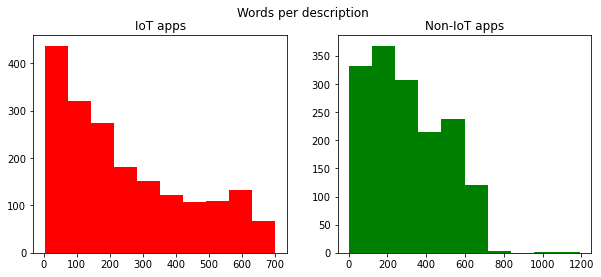

In [47]:
# PLOTTING WORD-COUNT
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=df[df['IoT']==1]['word_count']
ax1.hist(train_words,color='red')
ax1.set_title('IoT apps')
train_words=df[df['IoT']==0]['word_count']
ax2.hist(train_words,color='green')
ax2.set_title('Non-IoT apps')
fig.suptitle('Words per description')
plt.show()

In [49]:
df['char_count'] = df['description'].apply(lambda x: len(str(x)))
print('Avg number of characters in IoT apps: ', df[df['IoT']==1]['char_count'].mean()) #IoT tweets
print('Avg number of characters in non IoT apps: ', df[df['IoT']==0]['char_count'].mean()) #Non-IoT tweets

Avg number of characters in IoT apps:  1553.308499475341
Avg number of characters in non IoT apps:  1917.7184343434344


## Removing punctuation and stopwords from the description and applying lemmatization.

In [50]:
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

df['clean_text'] = df['description'].apply(lambda x: finalpreprocess(x))
df.head()

,pkg_name,app_name,version,description,category,category_id,content_rating,installs,content_rating_description,url,iot,IoT,word_count,char_count,clean_text
0,com.amazon.dee.app,Amazon Alexa,2.2.511197.0,Use the Amazon Alexa App to set up your Alexa-...,Lifestyle,LIFESTYLE,Everyone,"100,000,000+",NaN,https://play.google.com/store/apps/details?id=...,True,1,218,1332,use amazon alexa app set alexa enabled device ...
1,abnehm.app.low.carb,Low Carb Tracker & Recipes App,2.22.4,This weight loss app is offering you a) cookin...,Health & Fitness,HEALTH_AND_FITNESS,Everyone,"500,000+",NaN,https://play.google.com/store/apps/details?id=...,False,1,432,2416,weight loss app offer cook video healthy recip...
2,act.exam,ACT Exam Prep 2023,1.0.4,ACT Exam Prep 2023 is a test prep app that wil...,Education,EDUCATION,Everyone,"1,000+",NaN,https://play.google.com/store/apps/details?id=...,False,1,497,3027,act exam prep test prep app help pass american...
3,ai.bite.biteapp,Bitesnap: Photo Food Tracker a,1.7.1,Bitesnap is a fun and easy way to track what y...,Health & Fitness,HEALTH_AND_FITNESS,Everyone,"100,000+",NaN,https://play.google.com/store/apps/details?id=...,True,1,281,1608,bitesnap fun easy way track eat save time reco...
4,ai.mxlabs.heartmonitor,Heart Monitor: Measure BP & HR,2.0.17,Heart Monitor is an easy-to-use camera-based h...,Medical,MEDICAL,Everyone,"100,000+",NaN,https://play.google.com/store/apps/details?id=...,True,1,399,2643,heart monitor easy use camera base health scre...


In [53]:
from wordcloud import WordCloud
IoT_words = ''
non_IoT_words = ''

In [56]:
df = df.replace(['non_IoT', 'IoT'], [0, 1])

In [57]:
df

,pkg_name,app_name,version,description,category,category_id,content_rating,installs,content_rating_description,url,iot,IoT,word_count,char_count,clean_text
0,com.amazon.dee.app,Amazon Alexa,2.2.511197.0,Use the Amazon Alexa App to set up your Alexa-...,Lifestyle,LIFESTYLE,Everyone,"100,000,000+",NaN,https://play.google.com/store/apps/details?id=...,True,1,218,1332,use amazon alexa app set alexa enabled device ...
1,abnehm.app.low.carb,Low Carb Tracker & Recipes App,2.22.4,This weight loss app is offering you a) cookin...,Health & Fitness,HEALTH_AND_FITNESS,Everyone,"500,000+",NaN,https://play.google.com/store/apps/details?id=...,False,1,432,2416,weight loss app offer cook video healthy recip...
2,act.exam,ACT Exam Prep 2023,1.0.4,ACT Exam Prep 2023 is a test prep app that wil...,Education,EDUCATION,Everyone,"1,000+",NaN,https://play.google.com/store/apps/details?id=...,False,1,497,3027,act exam prep test prep app help pass american...
3,ai.bite.biteapp,Bitesnap: Photo Food Tracker a,1.7.1,Bitesnap is a fun and easy way to track what y...,Health & Fitness,HEALTH_AND_FITNESS,Everyone,"100,000+",NaN,https://play.google.com/store/apps/details?id=...,True,1,281,1608,bitesnap fun easy way track eat save time reco...
4,ai.mxlabs.heartmonitor,Heart Monitor: Measure BP & HR,2.0.17,Heart Monitor is an easy-to-use camera-based h...,Medical,MEDICAL,Everyone,"100,000+",NaN,https://play.google.com/store/apps/details?id=...,True,1,399,2643,heart monitor easy use camera base health scre...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3599,women.workout.female.fitness,Workout for Women: Fit at Home,1.4.5,Move now! A better me is approaching!\r\n\r\nG...,Health & Fitness,HEALTH_AND_FITNESS,Everyone,"50,000,000+",NaN,https://play.google.com/store/apps/details?id=...,NaN,0,406,2360,move well approach get fit woman workout femal...
3601,xyz.echoes.android,ECHOES,5.2.59,"-- Beautiful sound walks, smart technology, un...",Music & Audio,MUSIC_AND_AUDIO,Everyone,"10,000+",NaN,https://play.google.com/store/apps/details?id=...,NaN,0,193,1211,beautiful sound walk smart technology unique e...
3602,yqtrack.app,17TRACK Package Tracker,3.1.6483,17TRACK Package Tracker is a global shopping p...,Shopping,SHOPPING,Everyone,"10,000,000+",NaN,https://play.google.com/store/apps/details?id=...,NaN,0,446,3079,track package tracker global shopping package ...
3603,zahleb.me,Catch — Thrilling Chat Stories,3.3.8,In the Catch app you will find dozens of breat...,Books & Reference,BOOKS_AND_REFERENCE,Teen,"10,000,000+","Violence, Blood, Sexual Themes, Use of Alcohol...",https://play.google.com/store/apps/details?id=...,NaN,0,162,928,catch app find dozen breathtaking chat story t...


In [58]:
for val in df[df['IoT'] == 0].clean_text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        non_IoT_words = non_IoT_words + words + ' '

# Creating a corpus of ham messages
for val in df[df['IoT'] == 1].clean_text:
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        IoT_words = IoT_words + words + ' '

In [59]:
non_IoT_wordcloud = WordCloud(width=500, height=300).generate(non_IoT_words)
IoT_wordcloud = WordCloud(width=500, height=300).generate(IoT_words)

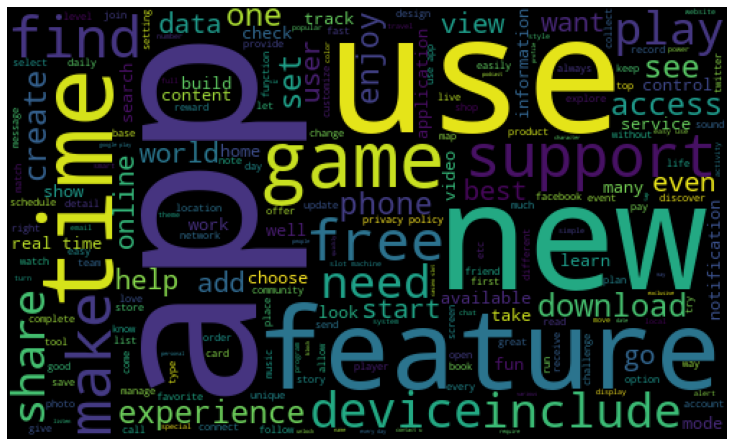

In [60]:
#Non IoT Word cloud
plt.figure( figsize=(10,8), facecolor='w')
plt.imshow(non_IoT_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

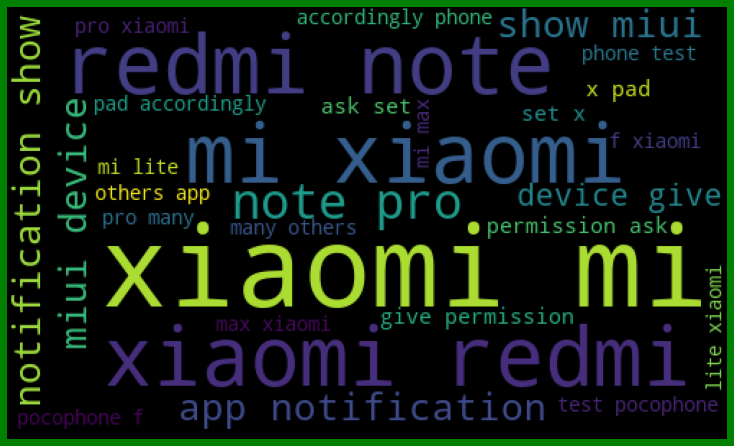

In [61]:
#Creating IoT wordcloud
plt.figure( figsize=(10,8), facecolor='g')
plt.imshow(IoT_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## vectorisation

In [62]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df['clean_text'])
vectors.shape

(3490, 24380)

## Train test split

In [66]:
features = vectors
X_train, X_test, y_train, y_test = train_test_split(features, df['IoT'], test_size=0.15, random_state=111)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#initialize multiple classification models
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

clfs = {'SVC' : svc,'KNeighborsClassifier' : knc, 'naive_bayes': mnb, 'DecisionTreeClassifier': dtc, 'LogisticRegression': lrc, 'RandomForestClassifier': rfc}

In [68]:
#fit the data onto the models
def train(clf, features, targets):
    clf.fit(features, targets)

def predict(clf, features):
    return (clf.predict(features))

In [69]:
pred_scores_word_vectors = []
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred = predict(v, X_test)
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred)]))

pred_scores_word_vectors

[('SVC', [0.7919847328244275]),
 ('KNeighborsClassifier', [0.7461832061068703]),
 ('naive_bayes', [0.7938931297709924]),
 ('DecisionTreeClassifier', [0.6564885496183206]),
 ('LogisticRegression', [0.7366412213740458]),
 ('RandomForestClassifier', [0.7175572519083969])]

In [87]:
# Get predictions from the SVC model
svc_preds = svc.predict(features)

# Create a DataFrame with the predictions and the original data
results = pd.DataFrame({
    'IoT_Prediction': svc_preds,
    'Original_Data': df['IoT']
}, index=df.index)

# Filter the DataFrame to only include apps identified as IoT companion apps
iot_apps = results[results['IoT_Prediction'] == 1]

# Randomly select 100 samples from these results
sample_iot_apps = iot_apps.sample(n=100, random_state=111)

print(sample_iot_apps)


      IoT_Prediction  Original_Data
395                1              1
1674               1              1
429                1              1
1555               1              1
370                1              1
...              ...            ...
1855               1              1
1600               1              1
25                 1              1
1074               1              1
1725               1              1

[100 rows x 2 columns]


In [90]:
sample_iot_apps_full = sample_iot_apps.join(df)
pd.set_option('display.max_rows', None)



,IoT_Prediction,Original_Data,pkg_name,app_name,version,description,category,category_id,content_rating,installs,content_rating_description,url,iot,IoT,word_count,char_count,clean_text
395,1,1,com.conair,WW Tracker Scale by Conair,2.2.1,The WW smart bathroom scale app is a companion...,Health & Fitness,HEALTH_AND_FITNESS,Everyone,"100,000+",NaN,https://play.google.com/store/apps/details?id=...,True,1,175,904,ww smart bathroom scale app companion app cona...
1674,1,1,com.wg3alsnan.t3mry,وجع الاسنان وعلاجه,1.0,The application of toothache and its treatment...,Medical,MEDICAL,Everyone,"1,000+",NaN,https://play.google.com/store/apps/details?id=...,False,1,97,609,application toothache treatment provide method...
429,1,1,com.diet.pixsterstudio.ketodietican,Keto Manager-Keto Diet Tracker,11.6,Stay updated for your <b>Keto Diet </b> and nu...,Health & Fitness,HEALTH_AND_FITNESS,Everyone,"1,000,000+",NaN,https://play.google.com/store/apps/details?id=...,False,1,646,3897,stay update keto diet nutrition make count car...
1555,1,1,com.wenquan.cub1,Cubii JR2+ Owners Manual,1.0,Cubii JR2+ Owners Manual in PDF format.\r\nThe...,Productivity,PRODUCTIVITY,Everyone,50+,NaN,https://play.google.com/store/apps/details?id=...,False,1,26,166,cubii jr owner manual pdf format application s...
370,1,1,com.cdc.ledshop,LED Shop,1.11.0,LED Shop is an APP designed for full color LED...,Personalization,PERSONALIZATION,Everyone,"50,000+",NaN,https://play.google.com/store/apps/details?id=...,True,1,104,842,lead shop app design full color lead controlle...
1766,1,1,computime.smart.thermostat.home,Smart Thermostat,1.0.0,"Smart Thermostat, Smart life\r\n1. Various int...",Tools,TOOLS,Everyone,"10,000+",NaN,https://play.google.com/store/apps/details?id=...,True,1,46,295,smart thermostat smart life various intelligen...
1765,1,1,com.zzkko,SHEIN-Shopping Online,9.1.7,"Everything you love, now at your fingertips!\r...",Shopping,SHOPPING,Teen,"100,000,000+",NaN,https://play.google.com/store/apps/details?id=...,False,1,195,1238,everything love fingertip shein fun ultra affo...
1790,1,1,de.rapidrabbit.fchwls.systemsensor,System Sensor Doc Center,1.4.4,System Sensor Doc Center allows you to fetch a...,Tools,TOOLS,Everyone,"1,000+",NaN,https://play.google.com/store/apps/details?id=...,False,1,39,269,system sensor doc center allow fetch view docu...
354,1,1,com.canvasmi.smartii,SMARTii,5.0.3,"SMARTii, form filling made easy. Scan QR Code,...",Lifestyle,LIFESTYLE,Everyone,"1,000+",NaN,https://play.google.com/store/apps/details?id=...,True,1,172,1045,smartii form fill make easy scan qr code fill ...
1369,1,1,com.stickboy.camospace,CamoSpace - Hunting & Fishing,1.0.17,CamoSpace takes pride in creating a friendly e...,Social,SOCIAL,Teen,"1,000+",NaN,https://play.google.com/store/apps/details?id=...,False,1,79,516,camospace take pride create friendly environme...


In [91]:
len(sample_iot_apps_full[sample_iot_apps_full['IoT'] == 1])

88

In [92]:
88 / 100 

0.88

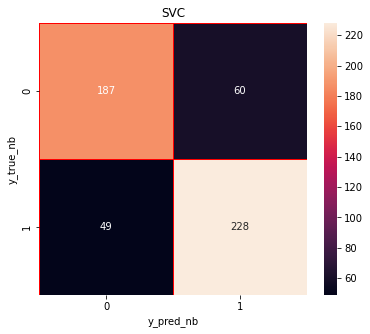

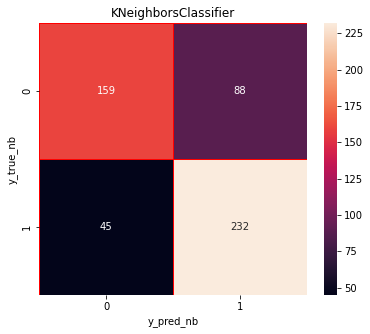

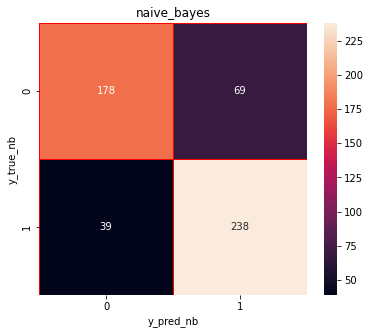

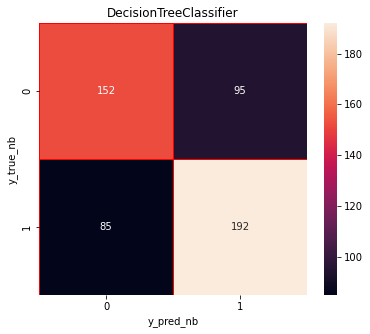

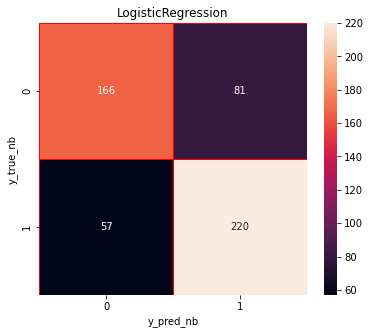

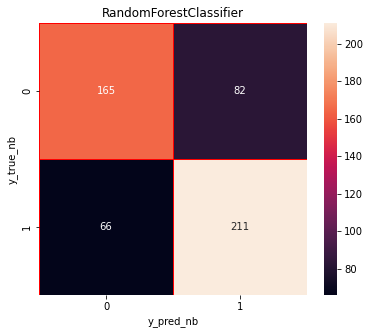

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Naive Bayes

for k,v in clfs.items():
    y_pred_nb = v.predict(X_test)
    y_true_nb = y_test
    cm = confusion_matrix(y_true_nb, y_pred_nb)
    f, ax = plt.subplots(figsize=(6, 5))
    sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="red",fmt = ".0f",ax=ax).set(title=k)
    plt.xlabel("y_pred_nb")
    plt.ylabel("y_true_nb")
    # plt.savefig('confusion_matrix.pdf')

## Prediction

In [70]:
def find(x):
    if x == 1:
        print ("App is IoT")
    else:
        print ("App is not IoT")